<a href="https://colab.research.google.com/github/dkovah/testing_stable_diffusion/blob/main/testing_stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generador de imágenes

In [2]:
#@title ##1- Instalar dependencias { display-mode: "form" }
!pip install diffusers==0.3.0 --quiet
!pip install transformers scipy ftfy --quiet
!pip install "ipywidgets>=7,<8" --quiet
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
#@title 2- Iniciar sesión en HugginFace { display-mode: "form" }
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
#@title 3- Descargar el modelo { display-mode: "form" }
import torch
from torch import autocast
from PIL import Image
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16, use_auth_token=True)
pipe = pipe.to("cuda")

def dummy_checker(images, **kwargs): return images, False
pipe.safety_checker = dummy_checker
from random import randint

52718749


  0%|          | 0/21 [00:00<?, ?it/s]

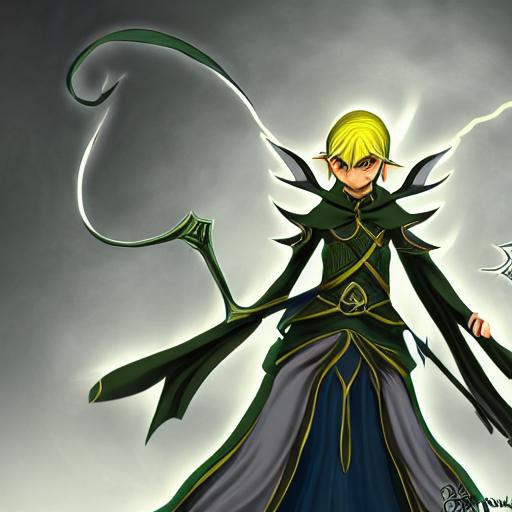

In [ ]:
#@title Generar imágenes
prompt = "Concept arc of an elf holding a blade" #@param {type:"string"}
inference_steps = 20 #@param {type:"number"}
guidance_scale = 7.5 #@param {type:"number"}
height=512 #@param {type:"number"}
width=512 #@param {type:"number"}
random_seed = True #@param {type:"boolean"}


seed = 0 #@param {type:"number"}

if random_seed:
  seed = randint(0, 100000000)

print("Semilla: ", seed)
generator = torch.Generator("cuda").manual_seed(seed)

with autocast("cuda"):
  image = pipe(prompt, num_inference_steps=inference_steps, generator=generator, height=height, width=width, guidance_scale=guidance_scale).images[0]
image

In [ ]:
from diffusers import StableDiffusionImg2ImgPipeline
from google.colab import files
from io import BytesIO
# Display images.
from IPython.display import display
from PIL import Image, ImageEnhance

device = "cuda"
model_path = "CompVis/stable-diffusion-v1-4"

pipe_img = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True
)
pipe_img = pipe_img.to(device)

{'trained_betas'} was not found in config. Values will be initialized to default values.


In [ ]:
uploaded = files.upload()

Saving cuso.png to cuso (1).png


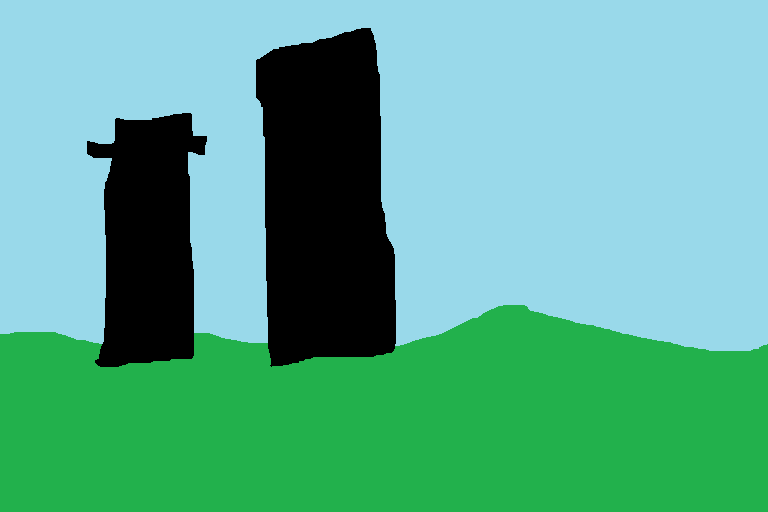

In [ ]:
image_name = 'cuso.png'
size = (768, 512)

image = Image.open(BytesIO(uploaded[image_name])).resize(size)
display(image)

  0%|          | 0/38 [00:00<?, ?it/s]

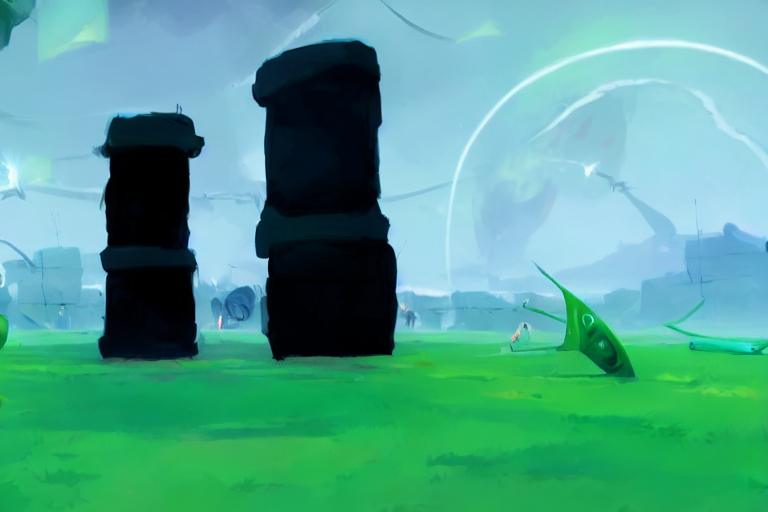

In [ ]:
prompt = "a battle arena, Marc Brunet digital artstyle"
generator2 = torch.Generator(device=device).manual_seed(234)

with autocast("cuda"):
    image = pipe_img(prompt=prompt, num_inference_steps=50, init_image=image, strength=0.75, guidance_scale=7.5, generator=generator2).images[0]
image